Programming Assignment :  Regression

Course Advisor: Prof. S.R.M. Prasanna

Course TA's: Jagabandhu Mishra (183081002@iitdh.ac.in) and 
             Seema K. (173021001@iitdh.ac.in)


Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning) 

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



In [3]:
w0 = 10
w1 = 1
random_noise_weight = 0.1

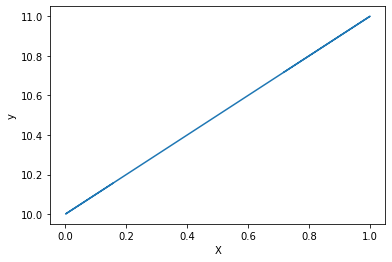

In [4]:
# write your code here
X = np.random.rand(1000)
y = w1* X + w0

plt.figure()
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

(1000,)


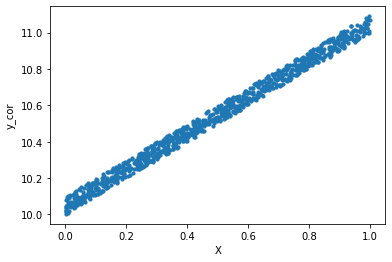

In [5]:
# write your code here
random_noise = np.random.rand(y.shape[0])
y_cor = y + random_noise_weight*random_noise
print(y_cor.shape)

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.xlabel('X')
plt.ylabel('y_cor')
plt.show()

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{cor_{i}}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

In [6]:
X_d = np.c_[np.ones((1000, 1)), X] # Add x0=1 to each training example
y_cor = np.expand_dims(y_cor, axis=-1)

1.0780780780780779


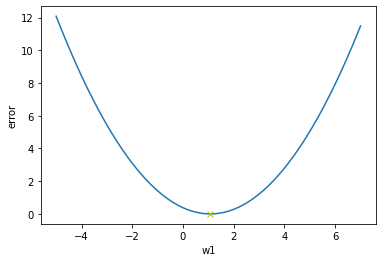

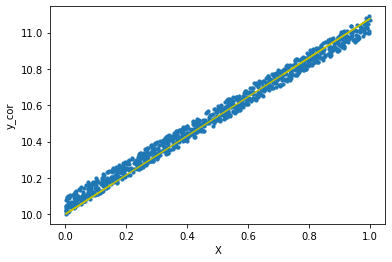

In [7]:
# implementation of heurastic search for 1 variable case
# write your code here
def error_as_function_of_w1(X_d, y_cor):
    srch_w1 = np.linspace(-5, 7, 1000)
    W = np.c_[np.full((1000, 1), w0), srch_w1] # Add w0 to each srch_w1 value
    y_pred = np.dot(W, X_d.T)
    error = np.sum((y_cor.T - y_pred)**2, axis = 1)/y_cor.shape[0]
    return srch_w1, error, W

srch_w1, error, W = error_as_function_of_w1(X_d, y_cor)
min_err_w1 = srch_w1[np.argmin(error)]
print(min_err_w1)

plt.figure()
plt.plot(srch_w1, error, '-')
plt.plot(min_err_w1, np.min(error), 'yx')
plt.xlabel('w1')
plt.ylabel('error')
plt.show()

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.plot(X, np.dot(X_d, W[np.argmin(error), :].T), 'y-')
plt.xlabel('X')
plt.ylabel('y_cor')
plt.show()

d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

In [8]:
def calculate_error(w, X, y):
    m = X.shape[0]
    return np.sum((y- np.dot(X, w))**2)/m

In [9]:
def gradient_descent_w1(X, y, w, num_iterations=1000, learning_rate=0.01):
    error = []
    w1 = []
    m = X.shape[0]
    for i in range(num_iterations):
        w = w - ((2*learning_rate*(np.dot(X.T, (np.dot(X, w)-y)))/m))
        w[0,0] = 10
        error.append(calculate_error(w, X, y))
        w1.append(w[1, 0])
    return error, w, w1

[[10.        ]
 [ 1.07549018]]


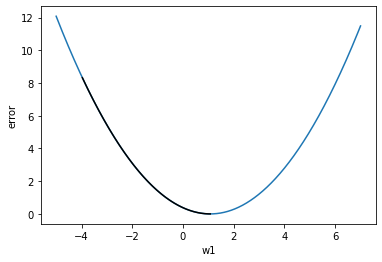

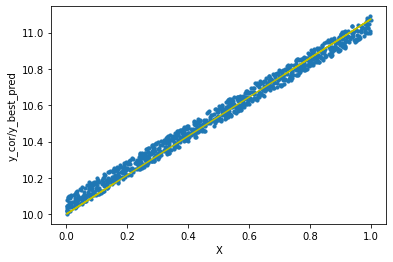

In [10]:
# write your code here
w = np.array([[10], [-4]])
errors, w, w1s = gradient_descent_w1(X_d, y_cor, w, num_iterations = 5000, learning_rate=0.01)
print(w)

srch_w1, error_w1, W = error_as_function_of_w1(X_d, y_cor)

plt.figure()
plt.plot(srch_w1, error, '-')
plt.plot(w1s, errors, '-', color = "black")
plt.xlabel('w1')
plt.ylabel('error')
plt.show()

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.plot(X, np.dot(X_d, w), 'y-')
plt.xlabel('X')
plt.ylabel('y_cor/y_best_pred')
plt.show()

# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

In [11]:
w0 = 5
w1 = 1.5
random_noise_weight = 0.1

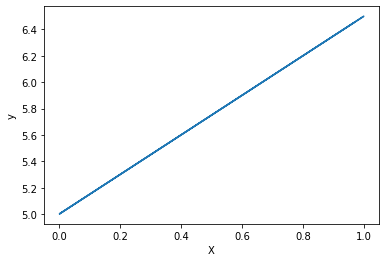

In [12]:
# write your code here
X = np.random.rand(1000)
y = w0 + w1*X

plt.figure()
plt.plot(X, y, '-')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

(1000,)


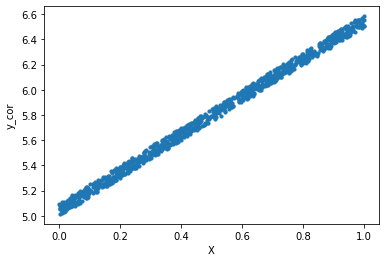

In [13]:
# write your code here
random_noise = np.random.rand(y.shape[0])
y_cor = y + random_noise_weight*random_noise
print(y_cor.shape)

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.xlabel('X')
plt.ylabel('y_cor')
plt.show()

In [14]:
X_d = np.c_[np.ones((1000, 1)), X] # Add x0=1 to each training example
y_cor = np.expand_dims(y_cor, axis=-1)

c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

(100, 2, 100)
(1000, 1) (100, 100, 1000)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


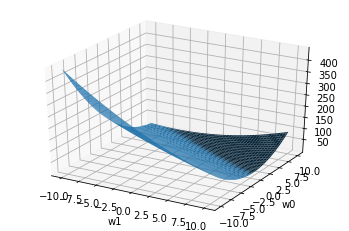

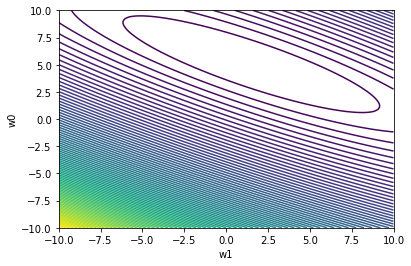

In [15]:
# write your code here     
def error_as_function_of_w0_w1(X_d, y_cor):
    srch_w0 = np.linspace(-10, 10, 100)
    srch_w1 = np.linspace(-10, 10, 100)
    w0, w1 = np.meshgrid(srch_w0, srch_w1)
    w0 = np.expand_dims(w0, axis=0)
    w1 = np.expand_dims(w1, axis=0)
    W = np.concatenate([w0, w1], axis=0)
    W = np.moveaxis(W, 0, 1)
    print(W.shape)
    #X_d = np.expand_dims(X_d, axis=0)
    y_pred = np.dot(X_d, W)
    y_pred = np.moveaxis(y_pred, 0, 2)
    print(y_cor.shape, y_pred.shape)
    error = np.sum((y_cor.T - y_pred)**2, axis = 2)/y_cor.shape[0]
    return W[:, 1, :], W[:, 0, :], error

w0, w1, error = error_as_function_of_w0_w1(X_d, y_cor)
print(w0.shape, w1.shape, error.shape)
#w0 = np.squeeze(w0, axis=0)
#w1 = np.squeeze(w1, axis=0)
print(w0.shape, w1.shape, error.shape)
# w0 = np.expand_dims(w0, axis=-1)
# w1 = np.expand_dims(w1, axis=-1)
# error = np.expand_dims(error, axis=-1)
# print(error)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w0, w1, error)
plt.xlabel('w1')
plt.ylabel('w0')
plt.show()

plt.figure()
plt.contour(w0, w1, error, levels=100)
plt.xlabel('w1')
plt.ylabel('w0')
plt.show()

d) Gradient descent:

In [16]:
def gradient_descent(X, y, w, num_iterations=1000, learning_rate=0.01):
    error = []
    w1 = []
    w0 = []
    m = X.shape[0]
    for i in range(num_iterations):
        error.append(calculate_error(w, X, y))
        w1.append(w[1, 0])
        w0.append(w[0, 0])
        w = w - ((2*learning_rate*(np.dot(X.T, (np.dot(X, w)-y)))/m))
    return error, w, w1, w0

(100, 2, 100)
(1000, 1) (100, 100, 1000)


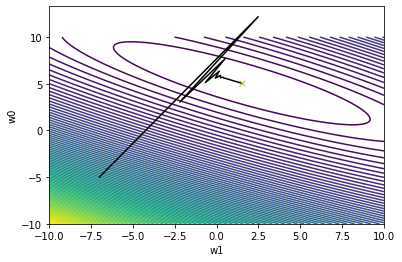

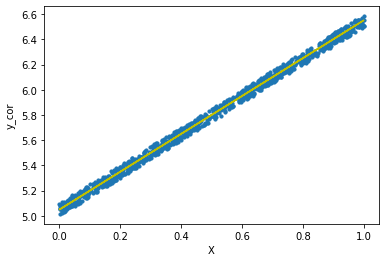

In [17]:
# Gradient descent
w1_init = -7 # initialization 
w0_init = -5
lr = 0.6  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001
# write your code here

w = np.array([[w0_init], [w1_init]])
errors, w, w1_grad, w0_grad = gradient_descent(X_d, y_cor, w, 1000, 0.6)

w0, w1, error = error_as_function_of_w0_w1(X_d, y_cor)

plt.figure()
plt.contour(w0, w1, error, levels=100)
plt.plot(w1_grad, w0_grad, '-', color = "black")
plt.plot(w[1, 0], w[0, 0], 'yx')
plt.xlabel('w1')
plt.ylabel('w0')
plt.show()

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.plot(X, np.dot(X_d, w), 'y-')
plt.xlabel('X')
plt.ylabel('y_cor')
plt.show()

#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2 

In [18]:
w0 = 0
w1 = -2
w2 = -2
random_noise_weight = 0.01

w = np.array([[w0], [w1], [w2]])

(30, 30)


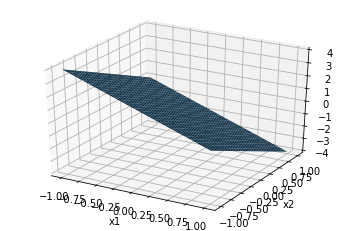

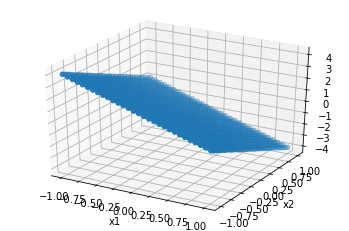

In [19]:
# write your code here
m = 30
x = np.linspace(-1,1,30)
y = np.linspace(-1,1,30)

X,Y = np.meshgrid(x,y)
Z= w2*X + w1*Y + w0
print(Z.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Z_cor = Z + random_noise_weight*np.random.randn(30, 30)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X, Y, Z_cor)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

b) Generate Error surface

In [20]:
X_flatten = X.ravel()
Y_flatten = Y.ravel()

X_d = np.c_[np.ones((m*m, 1)), X_flatten, Y_flatten] # Construct the design matrix
y_cor = Z_cor.ravel()
y_cor = np.expand_dims(y_cor, axis=-1)

(3, 100, 100)
(100, 3, 100)
(900, 100, 100)
(900, 1) (100, 100, 900)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


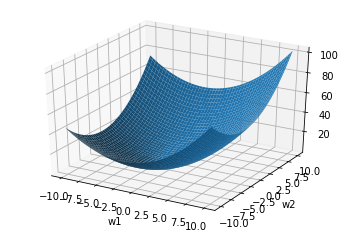

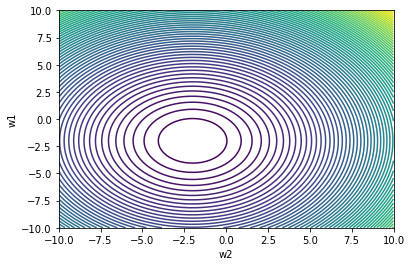

In [21]:
# write your code here
def error_as_function_of_w1_w2(X_d, y_cor):
    srch_w1 = np.linspace(-10, 10, 100)
    srch_w2 = np.linspace(-10, 10, 100)
    w1, w2 = np.meshgrid(srch_w1, srch_w2)
    w1 = np.expand_dims(w1, axis=0)
    w2 = np.expand_dims(w2, axis=0)
    W = np.concatenate([np.full(w1.shape, w0), w1, w2], axis=0)
    print(W.shape)
    W = np.moveaxis(W, 0, 1)
    print(W.shape)
    #X_d = np.expand_dims(X_d, axis=0)
    y_pred = np.dot(X_d, W)
    print(y_pred.shape)
    y_pred = np.moveaxis(y_pred, 0, 2)
    print(y_cor.shape, y_pred.shape)
    error = np.sum((y_cor.T - y_pred)**2, axis = 2)/(y_cor.shape[0])
    return W[:, 1, :], W[:, 2, :], error

w1, w2, error = error_as_function_of_w1_w2(X_d, y_cor)
print(w1.shape, w2.shape, error.shape)
#w0 = np.squeeze(w0, axis=0)
#w1 = np.squeeze(w1, axis=0)
print(w1.shape, w2.shape, error.shape)
# w0 = np.expand_dims(w0, axis=-1)
# w1 = np.expand_dims(w1, axis=-1)
# error = np.expand_dims(error, axis=-1)
# print(error)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1, w2, error)
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()

plt.figure()
plt.contour(w1, w2, error, levels=100)
plt.xlabel('w2')
plt.ylabel('w1')
plt.show()

c) Gradient descent:

In [22]:
def gradient_descent_plane(X, y, w, num_iterations=1000, learning_rate=0.01):
    error = []
    w1 = []
    w2 = []
    m = X.shape[0]
    for i in range(num_iterations):
        w = w - ((2*learning_rate*(np.dot(X.T, (np.dot(X, w)-y)))/m))
        w[0, 0] = w0
        error.append(calculate_error(w, X, y))
        w1.append(w[1, 0])
        w2.append(w[2, 0])
    return error, w, w1, w2

(3, 1) () ()
(3, 100, 100)
(100, 3, 100)
(900, 100, 100)
(900, 1) (100, 100, 900)


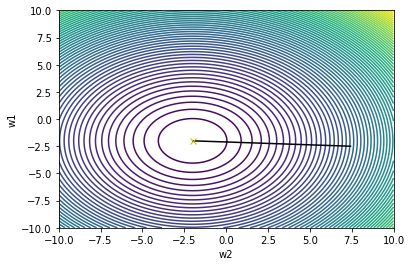

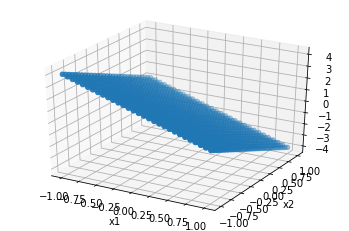

In [23]:
# write your code here
w1_init = 7.5 # initialization 
w2_init = -2.5

w = np.array([[w0], [w1_init], [w2_init]])
errors, w, w1_grad, w2_grad = gradient_descent_plane(X_d, y_cor, w, 1000, 0.01)

print(w.shape, w1_grad[0].shape, w2_grad[0].shape)

w1, w2, error = error_as_function_of_w1_w2(X_d, y_cor)

plt.figure()
plt.contour(w1, w2, error, levels=100)
plt.plot(w1_grad, w2_grad, '-', color="black")
plt.plot(w[1, 0], w[2, 0], 'yx')
plt.xlabel('w2')
plt.ylabel('w1')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X, Y, np.dot(X_d, w))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

In [24]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable
    
    def grad_update(self,w_old,lr,y,x):
        w = w_old - ((2*lr*(np.dot(x, (np.dot(x.T, w_old)-y)))/x.shape[1]))
        return w

    def error(self,w,y,x):
        return np.sum((y- np.dot(x.T, w))**2)/x.shape[1]

    def mat_inv(self,y,x_aug):
        return np.linalg.inv(x_aug.dot(x_aug.T)).dot(x_aug).dot(y)

    def Regression_grad_des(self,x,y,lr):
        w_pred = np.zeros((x.shape[0], 1))
        err = []
        for i in range(1000):
            w_pred = self.grad_update(w_pred, lr, y, x)
            err.append(self.error(w_pred, y, x))
        return w_pred,err

In [25]:
# Generating data
sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w=np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)

x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)

y=np.dot(x_aug.T, w)  # vector multiplication
print(y.shape)

nois=np.random.uniform(0,1,y.shape) # corrupt by noise
y=y+0.1*nois

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)


[[1.05060373]
 [1.99953022]
 [3.0025788 ]
 [5.00133279]
 [8.9978813 ]
 [3.00082322]]
[[1.05078126]
 [1.99360284]
 [2.99727715]
 [4.9954284 ]
 [8.98393409]
 [2.99616229]]


Text(0, 0.5, 'error')

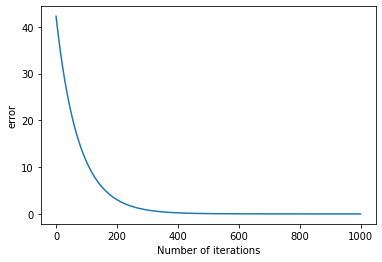

In [26]:
reg = regression() # constructing an instance of regression class
w_opt=reg.mat_inv(y,x_aug) # calculating coefficients by Normal equation
print(w_opt)

lr=0.01 # calculating coefficients by Gradien Descent
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)
plt.xlabel('Number of iterations')
plt.ylabel('error')

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

In [27]:
w = np.array([[-3], [-3], [1.25], [0.25]])
w

array([[-3.  ],
       [-3.  ],
       [ 1.25],
       [ 0.25]])

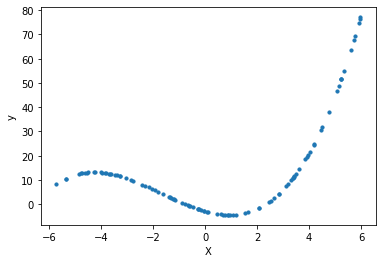

In [28]:
X = np.random.uniform(-6, 6, (100))
X = np.sort(X)
y = 0.25*X**3 + 1.25*X**2 - 3*X - 3

plt.figure()
plt.scatter(X, y, s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

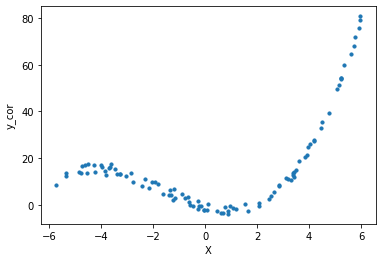

In [29]:
y_cor = y + 5*np.random.rand(y.shape[0])

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.xlabel('X')
plt.ylabel('y_cor')
plt.show()

In [30]:
def data_transform(X,degree):
    X_new = np.ones((X.shape[0], 1))
    for i in range(1, degree+1):
        X_new = np.c_[X_new, X**i]
    return X_new.T

In [31]:
X_t = data_transform(X,3)
y = np.dot(X_t.T, w)

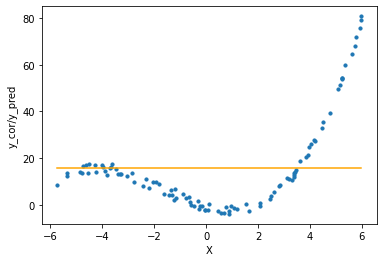

In [32]:
reg=regression()

#degree 0 calculation
degree = 0
X_0 = data_transform(X, degree)
w_mat = reg.mat_inv(y_cor, X_0)
y_pred = np.dot(X_0.T, w_mat)

lr = 0.01
w_grad, err = reg.Regression_grad_des(X_0,y_cor,lr)

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.plot(X, y_pred, '-', color='orange')
plt.xlabel('X')
plt.ylabel('y_cor/y_pred')
plt.show()    

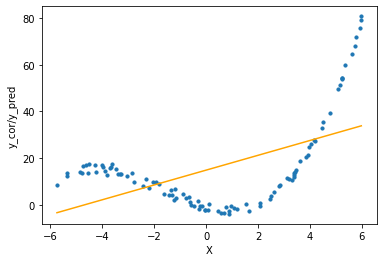

In [33]:
# degree 1 calculation
degree = 1
X_1 = data_transform(X, degree)
w_mat = reg.mat_inv(y_cor, X_1)
y_pred = np.dot(X_1.T, w_mat)

lr = 0.01
w_grad, err = reg.Regression_grad_des(X_1,y_cor,lr)

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.plot(X, y_pred, '-', color='orange')
plt.xlabel('X')
plt.ylabel('y_cor/y_pred')
plt.show()

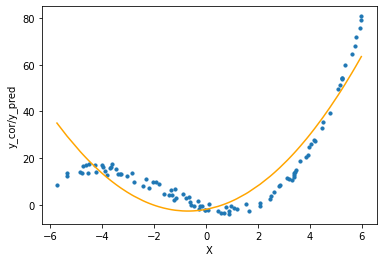

In [34]:
# degree 2 calculation
degree = 2
X_2 = data_transform(X, degree)
w_mat = reg.mat_inv(y_cor, X_2)
y_pred = np.dot(X_2.T, w_mat)

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.plot(X, y_pred, '-', color='orange')
plt.xlabel('X')
plt.ylabel('y_cor/y_pred')
plt.show()

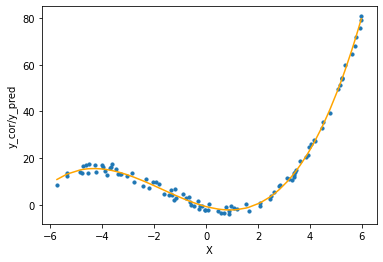

In [35]:
# degree 3 calculation
degree = 3
X_3 = data_transform(X, degree)
w_mat = reg.mat_inv(y_cor, X_3)
y_pred = np.dot(X_3.T, w_mat)

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.plot(X, y_pred, '-', color='orange')
plt.xlabel('X')
plt.ylabel('y_cor/y_pred')
plt.show()

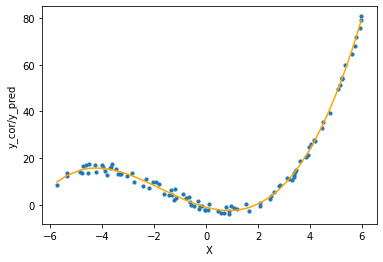

In [36]:
# degree 4 calculation
degree = 4
X_4 = data_transform(X, degree)
w_mat = reg.mat_inv(y_cor, X_4)
y_pred = np.dot(X_4.T, w_mat)

plt.figure()
plt.scatter(X, y_cor, s=10)
plt.plot(X, y_pred, '-', color='orange')
plt.xlabel('X')
plt.ylabel('y_cor/y_pred')
plt.show()

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion and using Gradiant descent  method
4. find the mean square error in test. (as performance measure) 

In [37]:
import numpy as np
# from google.colab import files
# uploaded = files.upload()

sal_data = np.genfromtxt('salary_pred_data1.csv', delimiter=',', skip_header=1)
print(sal_data)

[[2.0000e+00 1.1000e+01 3.4000e+01 4.0000e+00 3.0000e+00 4.3068e+04]
 [4.0000e+00 1.4000e+01 2.8000e+01 1.0000e+00 4.0000e+00 4.8856e+04]
 [1.0000e+00 1.3000e+01 5.5000e+01 3.0000e+00 2.0000e+00 4.1910e+04]
 ...
 [1.0000e+00 1.8000e+01 2.5000e+01 3.0000e+00 1.0000e+00 2.1050e+04]
 [4.0000e+00 3.0000e+00 5.1000e+01 1.0000e+00 3.0000e+00 5.1402e+04]
 [4.0000e+00 1.4000e+01 5.8000e+01 3.0000e+00 3.0000e+00 5.1216e+04]]


In [38]:
sal_data.shape

(1000, 6)

In [39]:
np.random.shuffle(sal_data)
x_train, x_test, y_train, y_test = sal_data[:900, :-1], sal_data[900:, :-1], sal_data[:900, -1:], sal_data[900:, -1:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((900, 5), (100, 5), (900, 1), (100, 1))

In [40]:
x_mean = x_train.mean(axis=0)
x_stdev = x_train.std(axis=0)

In [41]:
x_train_norm = (x_train - x_mean)/(x_stdev)
print(x_train_norm.shape)

(900, 5)


In [42]:
x_train_norm_aug = np.c_[np.ones((x_train_norm.shape[0], 1)), x_train_norm]
print(x_train_norm_aug.shape)

(900, 6)


[[5.14836510e+04]
 [2.25099114e+03]
 [1.79569465e+02]
 [1.92889727e+01]
 [2.66406868e+02]
 [1.26764378e+04]]


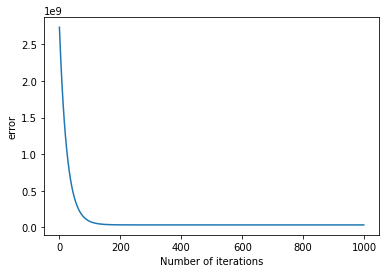

In [43]:
reg = regression()
lr = 0.01
w_pred,err = reg.Regression_grad_des(x_train_norm_aug.T,y_train,lr)

print(w_pred)

plt.figure()
plt.plot(err, '-')
plt.xlabel('Number of iterations')
plt.ylabel('error')
plt.show()

In [44]:
w_pred_mat_inv = reg.mat_inv(y_train,x_train_norm_aug.T)
print(w_pred_mat_inv)

[[5.14836511e+04]
 [2.25099117e+03]
 [1.79569457e+02]
 [1.92889640e+01]
 [2.66406867e+02]
 [1.26764378e+04]]


In [45]:
x_test_norm = (x_test - x_mean)/(x_stdev)
print(x_test_norm.shape)

(100, 5)


In [46]:
x_test_norm_aug = np.c_[np.ones((x_test_norm.shape[0], 1)), x_test_norm]
print(x_test_norm_aug.shape)

(100, 6)


In [47]:
train_error = reg.error(w_pred, y_train, x_train_norm_aug.T)/((np.max(y_train)-np.mean(y_train))**2)
test_error = reg.error(w_pred, y_test, x_test_norm_aug.T)/((np.max(y_test)-np.mean(y_test))**2)

print('Normalized training error = ', train_error)
print('Normalized testing error = ', test_error)

Normalized training error =  0.028610064079204356
Normalized testing error =  0.050731721449461545


In [48]:
y_test_pred = np.dot(x_test_norm_aug, w_pred)

print('First 3 predicted salary in test set:', y_test_pred[0:3], '\n')
print('First 3 actual salary in test set:', y_test[0:3], '\n')

First 3 predicted salary in test set: [[59227.7688847 ]
 [65926.58799034]
 [58292.40564956]] 

First 3 actual salary in test set: [[53898.]
 [67988.]
 [55082.]] 

